## POSTTEST 6

Rahmad Ramadhan

2109106116

#### Libarary yang di gunakan

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, datasets
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("cybersecurity_attacks.csv")
data

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


### Mengkonfersi colom "Action Teken" menjadi 0 dan 1

In [32]:
data["Action Taken"] = data["Action Taken"].replace({"no": 0, "yes": 1})

### Memilih Atribut x dan y

### Split Dataset Menjadi train dan set

In [33]:
X = data[["Source Port", "Destination Port"]]
Y = data["Action Taken"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Melakukan Standarisasi dan Encoding

In [34]:
# Standarisasi
ssc = StandardScaler()
data[["Source Port", "Destination Port"]] = ssc.fit_transform(
    data[["Source Port", "Destination Port"]])

# Encoding
encoder = OrdinalEncoder()
data[["Action Taken"]]=encoder.fit_transform(data[["Action Taken"]])

In [35]:
data.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

### Melakukan Preprocessing dengan Normalisasi

In [36]:
# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Membangun model Dengan Sequential 

In [37]:
model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape=[2]),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid'),
])

### Compile Model Dengan binary_crossentropy, accuracy

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Melatih Model

In [39]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
788/788 [==============================] - 4s 3ms/step - loss: 0.1021 - accuracy: 0.3302 - val_loss: 0.2792 - val_accuracy: 0.3364
Epoch 2/50
788/788 [==============================] - 2s 3ms/step - loss: 0.0333 - accuracy: 0.3300 - val_loss: 0.2773 - val_accuracy: 0.3364
Epoch 3/50
788/788 [==============================] - 2s 3ms/step - loss: 0.0257 - accuracy: 0.3300 - val_loss: 0.3588 - val_accuracy: 0.3364
Epoch 4/50
788/788 [==============================] - 2s 3ms/step - loss: 0.0274 - accuracy: 0.3300 - val_loss: 0.3474 - val_accuracy: 0.3364
Epoch 5/50
788/788 [==============================] - 2s 3ms/step - loss: 0.0227 - accuracy: 0.3300 - val_loss: 0.3463 - val_accuracy: 0.3364
Epoch 6/50
788/788 [==============================] - 2s 3ms/step - loss: 0.0195 - accuracy: 0.3300 - val_loss: 0.3321 - val_accuracy: 0.3364
Epoch 7/50
788/788 [==============================] - 2s 3ms/step - loss: 0.0123 - accuracy: 0.3300 - val_loss: 0.4112 - val_accuracy: 0.3364
Epoch 

In [40]:
# Evaluasi model pada test set
Y_pred = (model.predict(X_test) > 0.5).astype("int32")  
accuracy = accuracy_score(Y_test, Y_pred)

375/375 [==============================] - 1s 2ms/step


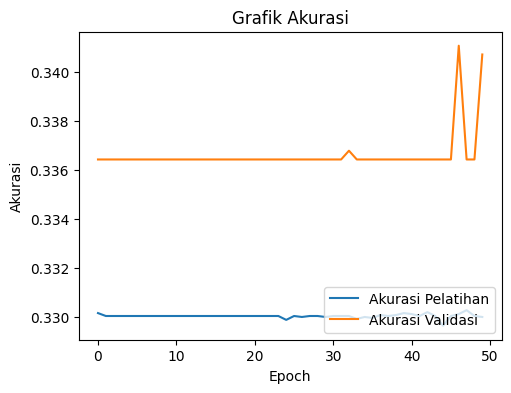

In [41]:
# Membuat grafik pergerakan metrik (akurasi dan loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi')
plt.legend(loc='lower right')

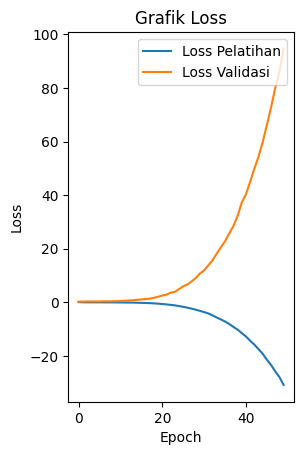

In [42]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()

In [43]:
print("Akurasi model pada test set",accuracy)

Akurasi model pada test set 0.3358333333333333
